In [104]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import librosa
import sounddevice as sd

In [ ]:
T = 1
N = 300
t = torch.linspace(0, T, N)


In [53]:
def signal(t):
  """
  Generate a synthetic signal with multiple frequencies. Using a combination of cosine and sine functions, with sine having different frequencies and amplitudes.
  """
  return torch.cos(2* np.pi * t) + 0.5 * torch.sin(2 * np.pi * 3 * t) + 0.2 * torch.sin(2 * np.pi * 5 * t)

In [ ]:
signal = signal(t)

tensor([1.0000, 1.0523, 1.1037, 1.1540, 1.2028, 1.2498, 1.2946, 1.3369, 1.3765,
        1.4131, 1.4463, 1.4760, 1.5020, 1.5242, 1.5422, 1.5562, 1.5659, 1.5713,
        1.5723, 1.5691, 1.5616, 1.5500, 1.5342, 1.5144, 1.4909, 1.4636, 1.4329,
        1.3990, 1.3621, 1.3224])


In [ ]:
print(signal[:30])

In [ ]:
a0 = torch.mean(signal)
print("a0:", a0)

a0: tensor(0.0033)


In [42]:
# Periodic sampling
n = 0.1*N
print("n:", n)

n: 30.0


In [43]:
an = torch.zeros(int(n))
bn = torch.zeros(int(n))

for k in range(int(n)):
  an[k] = 2 * torch.mean(signal * torch.cos(2 * np.pi * k * t))
  bn[k] = 2 * torch.mean(signal * torch.sin(2 * np.pi * k * t))

In [172]:
aHarmonics = np.sqrt(an**2 + bn**2 + 2*a0**2) 

/tmp/ipykernel_923214/926295421.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  aHarmonics = np.sqrt(an**2 + bn**2 + 2*a0**2)


In [64]:
recontructedSignal = torch.zeros_like(t) + a0

In [65]:
for k in range(int(n)):
  recontructedSignal += an[k] * torch.cos(2 * np.pi * k * t) + bn[k] * torch.sin(2 * np.pi * k * t)

In [66]:
print(recontructedSignal[:30])


tensor([1.2000, 1.2397, 1.2567, 1.2582, 1.2542, 1.2550, 1.2681, 1.2969, 1.3401,
        1.3922, 1.4455, 1.4925, 1.5280, 1.5497, 1.5592, 1.5603, 1.5579, 1.5558,
        1.5563, 1.5586, 1.5604, 1.5581, 1.5485, 1.5299, 1.5024, 1.4681, 1.4299,
        1.3908, 1.3527, 1.3161])


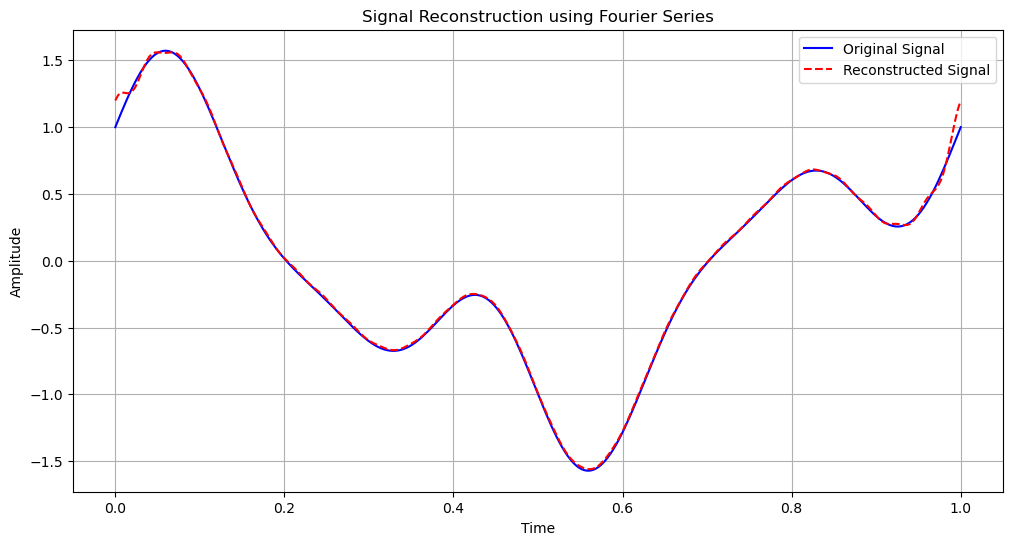

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(t.numpy(), signal.numpy(), label='Original Signal', color='blue')
plt.plot(t.numpy(), recontructedSignal.numpy(), label='Reconstructed Signal', color='red', linestyle='--')
plt.title('Signal Reconstruction using Fourier Series')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

In [150]:
audioSignal, sampleRate = librosa.load(
    "/home/gabrieldadcarvalho/github/image_processing/signal1D/audio_with_noise.mp3"
)
audioSignal = torch.tensor(audioSignal)

In [151]:
nAudio = audioSignal.shape[0]
tAudio = torch.arange(nAudio) / sampleRate

In [216]:
sd.play(audioSignal, sampleRate)
sd.wait()  # Wait until playback is finished

KeyboardInterrupt: 

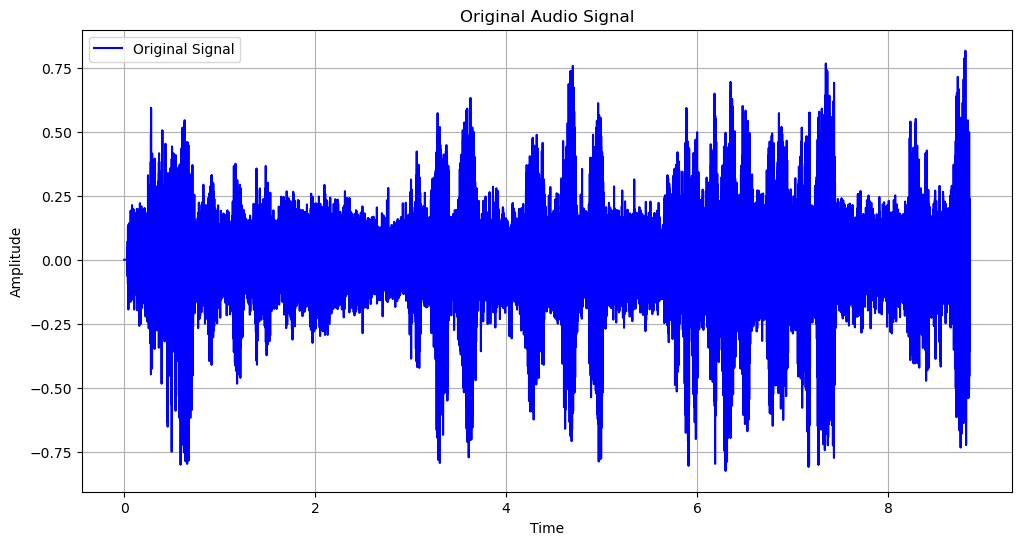

In [154]:
plt.figure(figsize=(12, 6))
plt.plot(tAudio, audioSignal, label="Original Signal", color="blue")
plt.title("Original Audio Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

In [ ]:
fftAudio = torch.fft.fft(audioSignal)
freqs = torch.fft.fftfreq(nAudio, d=1 / sampleRate)

In [228]:
periodogram = torch.abs(freqs) ** 2 / nAudio

In [214]:
# Aplicar um corte de frequência (ex: manter apenas frequências abaixo de 5kHz)
cutoff = 5000
mask = torch.abs(frequencies) < cutoff
fftAudioFiltered = fftAudio * mask

# Inversa para reconstruir o sinal
reconstructed = torch.fft.ifft(fftAudioFiltered).real

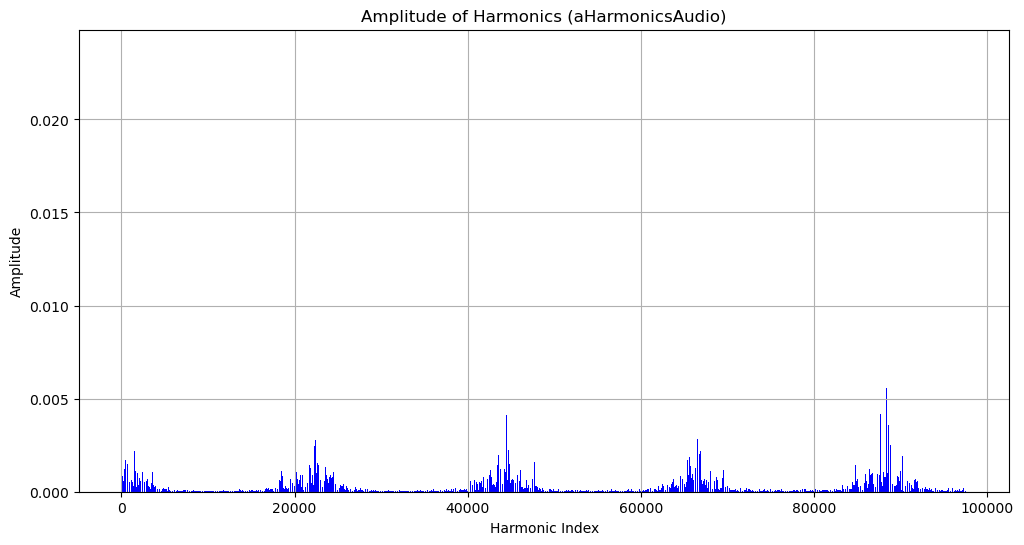

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(aHarmonicsAudio/2)), torch.mode(frequencies).values), color="blue")
plt.title("Amplitude of Harmonics (aHarmonicsAudio)")
plt.xlabel("Harmonic Index")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


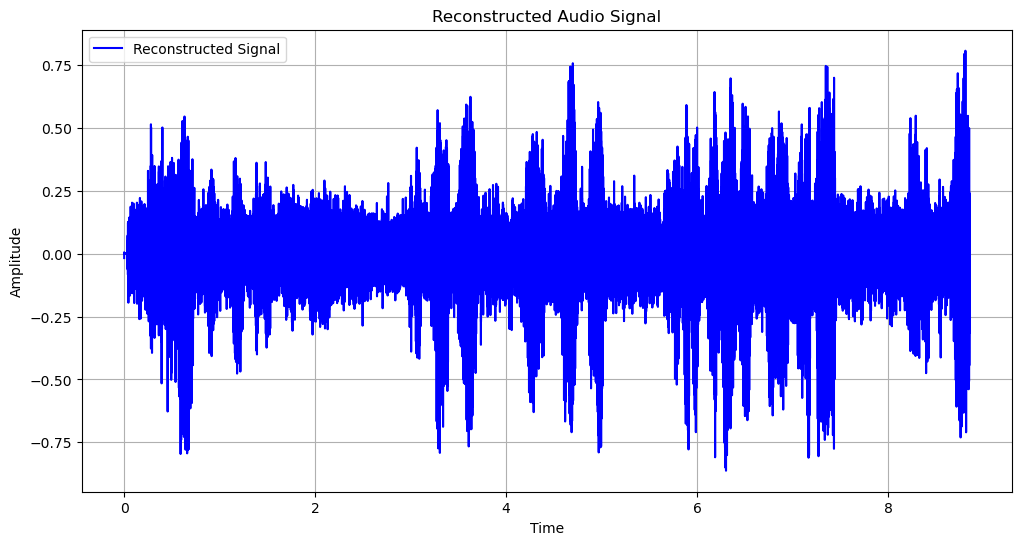

In [217]:
plt.figure(figsize=(12, 6))
plt.plot(tAudio, reconstructed, label="Reconstructed Signal", color="blue")
plt.title("Reconstructed Audio Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

In [215]:
sd.play(reconstructed, sampleRate)
sd.wait()  # Wait until playback is finished